<a href="https://colab.research.google.com/github/abishekabi/amber-detector/blob/main/Experiment_car_make_model_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import torch.utils.data as data
import fastai
print('fastai version: ',fastai.__version__)
import torchvision.models
import warnings
warnings.filterwarnings('ignore')

from pylab import *

import numpy as np
import time
from pathlib import Path
from IPython.display import Markdown, display


pytorch version:  1.7.0+cu101
fastai version:  1.0.61


In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [5]:
# !unzip data.zip

In [6]:
!ls car_data/car_data

prediction  test  train


In [7]:
!ls

anno_test.csv	car_make_model_classifier.ipynb  names.csv
anno_train.csv	Car-Models-Classifier		 StanfordNeuralNetwork
car_data	data.zip


In [8]:
img_dir = 'car_data'
path = Path(img_dir)
path.ls()

[PosixPath('car_data/car_data'),
 PosixPath('car_data/export.pkl'),
 PosixPath('car_data/first_model.pkl')]

In [9]:
data = ImageDataBunch.from_folder(f'{path}',valid_pct = 0.2,size = 224,bs = 64).normalize(imagenet_stats)

In [10]:
CAR_CLASSES = data.classes

In [11]:
for classes, numbers in enumerate(data.classes[:15]):
    print(classes,':',numbers)
len(data.classes),data.c

0 : AM General Hummer SUV 2000
1 : Acura Integra Type R 2001
2 : Acura RL Sedan 2012
3 : Acura TL Sedan 2012
4 : Acura TL Type-S 2008
5 : Acura TSX Sedan 2012
6 : Acura ZDX Hatchback 2012
7 : Aston Martin V8 Vantage Convertible 2012
8 : Aston Martin V8 Vantage Coupe 2012
9 : Aston Martin Virage Convertible 2012
10 : Aston Martin Virage Coupe 2012
11 : Audi 100 Sedan 1994
12 : Audi 100 Wagon 1994
13 : Audi A5 Coupe 2012
14 : Audi R8 Coupe 2012


(197, 197)

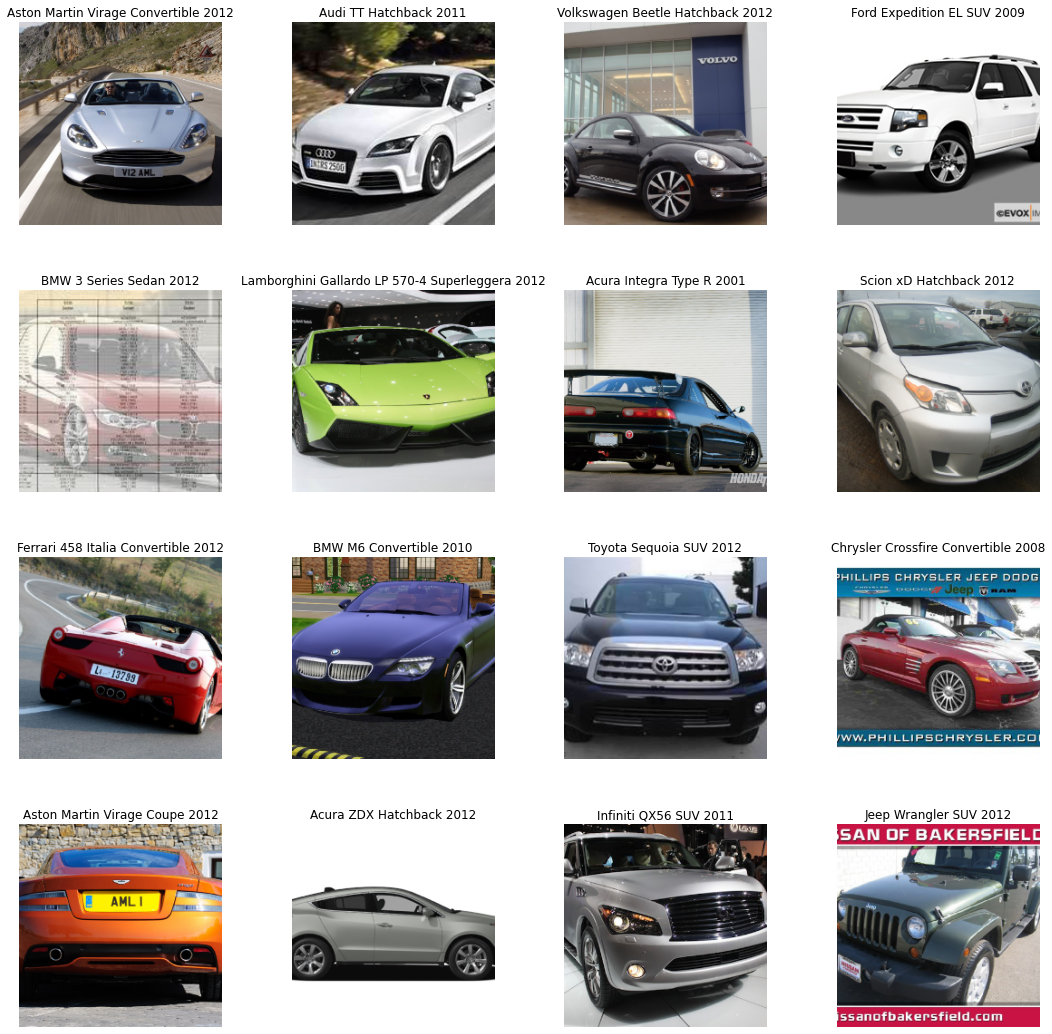

In [12]:
data.show_batch(rows = 4,figsize = (15,15))

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [15]:
learn.fit_one_cycle(6)

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('cycle-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6)

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('cycle-2',return_path=True)

In [ ]:
learn.export('./export.pkl')

In [18]:
!ls -la


total 1916986
-rw------- 1 root root     225299 Oct  1  2019 anno_test.csv
-rw------- 1 root root     228214 Oct  1  2019 anno_train.csv
drwx------ 3 root root       4096 Dec 16 16:12 car_data
-rw------- 1 root root    2295274 Dec 17 00:01 car_make_model_classifier.ipynb
drwx------ 2 root root       4096 Dec 16 02:23 Car-Models-Classifier
-rw------- 1 root root 1960225373 Dec 16 02:34 data.zip
-rw------- 1 root root       5454 Oct  1  2019 names.csv
drwx------ 2 root root       4096 Dec 16 01:36 StanfordNeuralNetwork


In [16]:
!ls -la car_data/

total 201670
drwx------ 5 root root      4096 Dec 16 02:34 car_data
-rw------- 1 root root 103252712 Dec 16 04:02 export.pkl
-rw------- 1 root root 103252615 Dec 16 05:26 first_model.pkl


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

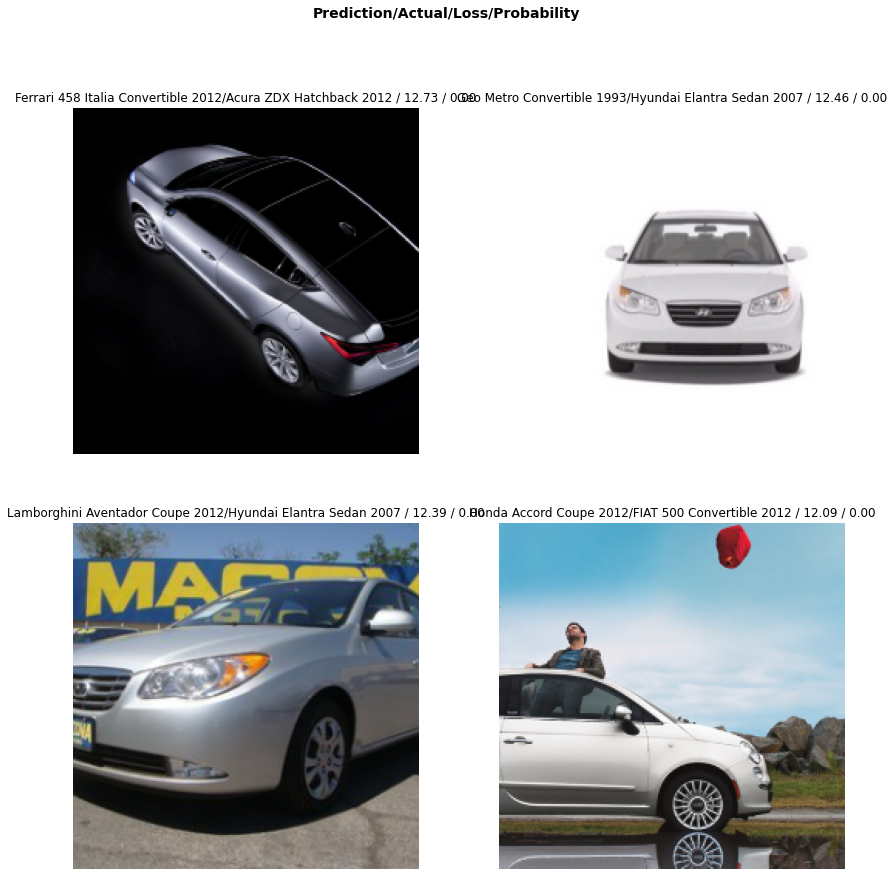

In [19]:
interp.plot_top_losses(4, figsize=(14,14),heatmap=False)

In [20]:
interp.most_confused(min_val=2)

[('BMW 3 Series Wagon 2012', 'Ferrari 458 Italia Convertible 2012', 13),
 ('Porsche Panamera Sedan 2012', 'Ferrari 458 Italia Convertible 2012', 13),
 ('Acura TSX Sedan 2012', 'Ferrari 458 Italia Convertible 2012', 11),
 ('Aston Martin V8 Vantage Coupe 2012',
  'Ferrari 458 Italia Convertible 2012',
  11),
 ('Ford Fiesta Sedan 2012', 'Lamborghini Aventador Coupe 2012', 11),
 ('Acura ZDX Hatchback 2012', 'Ferrari 458 Italia Convertible 2012', 10),
 ('Bentley Continental Flying Spur Sedan 2007',
  'Ferrari 458 Italia Convertible 2012',
  10),
 ('Ferrari California Convertible 2012', 'Nissan 240SX Coupe 1998', 10),
 ('GMC Savana Van 2012', 'Lamborghini Aventador Coupe 2012', 10),
 ('Acura TL Sedan 2012', 'Ferrari 458 Italia Convertible 2012', 9),
 ('Aston Martin Virage Coupe 2012', 'Ferrari 458 Italia Convertible 2012', 9),
 ('Audi S6 Sedan 2011', 'Ferrari 458 Italia Convertible 2012', 9),
 ('Audi TT Hatchback 2011', 'Ferrari 458 Italia Convertible 2012', 9),
 ('BMW 1 Series Coupe 2012', 

In [21]:
input, target = learn.get_preds()

In [22]:
print (top_k_accuracy(input=input, targs=target,k=1))

tensor(0.0046)


In [23]:
print (top_k_accuracy(input=input, targs=target,k=3))

tensor(0.0198)


# Predict

In [24]:
# def find_classes(dir):
#     classes = os.listdir(dir)
#     return classes
# classes = find_classes("car_data/car_data/train")

# print(classes)
CAR_CLASSES[:5]

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008']

In [25]:
!head StanfordNeuralNetwork/car_labels.csv

﻿filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,label_num,test,label
000001.jpg,112,7,853,717,1,FALSE,﻿'AM General Hummer SUV 2000'
000002.jpg,48,24,441,202,1,FALSE,﻿'AM General Hummer SUV 2000'
000003.jpg,7,4,277,180,1,FALSE,﻿'AM General Hummer SUV 2000'
000004.jpg,33,50,197,150,1,FALSE,﻿'AM General Hummer SUV 2000'
000005.jpg,5,8,83,58,1,FALSE,﻿'AM General Hummer SUV 2000'
000006.jpg,10,6,250,110,1,FALSE,﻿'AM General Hummer SUV 2000'
000007.jpg,56,1,394,176,1,FALSE,﻿'AM General Hummer SUV 2000'
000008.jpg,1,13,113,83,1,FALSE,﻿'AM General Hummer SUV 2000'
000009.jpg,15,111,271,272,1,FALSE,﻿'AM General Hummer SUV 2000'


In [26]:
!cat StanfordNeuralNetwork/car_labels.csv|grep 000001.jpg

000001.jpg,112,7,853,717,1,FALSE,﻿'AM General Hummer SUV 2000'


In [38]:
!ls -l car_data/car_data/prediction/

total 568
-rw------- 1 root root 142542 Dec 17 04:39 ford-f150.jpg
-rw------- 1 root root 171075 Dec 17 04:41 ford-gt.jpg
-rw------- 1 root root  42815 Dec 17 04:41 jeep2.jpg
-rw------- 1 root root  28165 Dec 17 04:40 jeep3.jpg
-rw------- 1 root root  36620 Dec 17 04:41 mini-cooper.jpg
-rw------- 1 root root  56737 Dec 17 04:41 odyssey.jpg
-rw------- 1 root root 101037 Dec 17 04:40 tesla-s.jpg


In [39]:
model_path = "car_data"
image_path = "car_data/car_data/prediction"
pred_img_file = "car_data/car_data/prediction/ford-f150.jpg"

In [29]:
M = load_learner(path=model_path, file='first_model.pkl')

In [40]:
im_pred=open_image(pred_img_file)

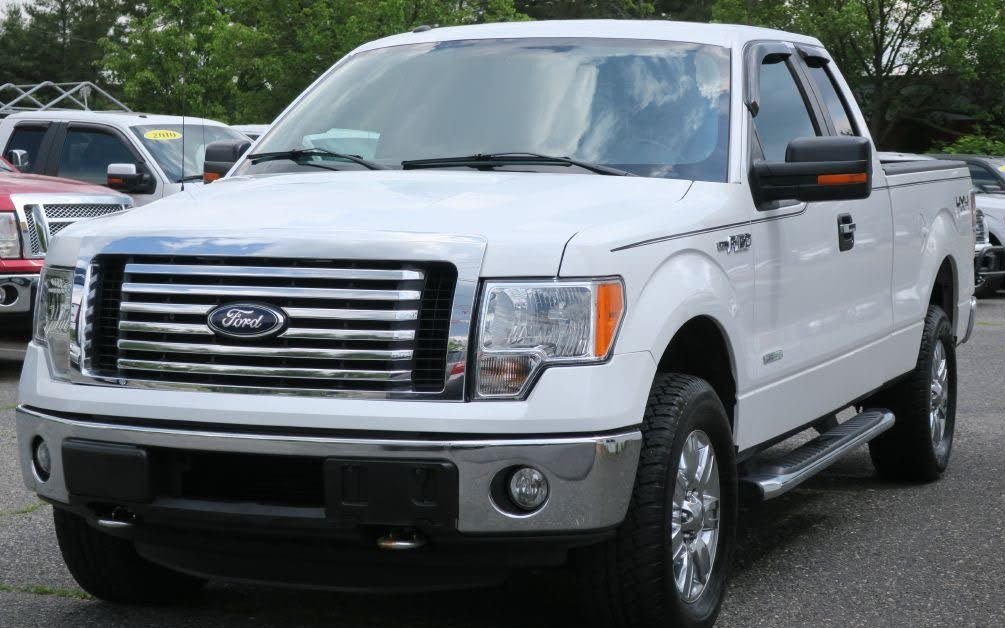

In [41]:
im_pred

In [42]:
pred = M.predict(im_pred)

### Predicted Car model

In [44]:
#!cat StanfordNeuralNetwork/car_labels.csv|grep 000001.jpg

In [45]:
#display(Markdown("###Actual Car: "), )
display(Markdown("<br>"))
display(Markdown("###Predicted Car: "), CAR_CLASSES[pred[1].cpu().numpy()])

<br>

###Predicted Car: 

'Ford Expedition EL SUV 2009'

## Car color

In [46]:
!pip install --quiet colorthief
!pip install --quiet webcolors==1.3

In [48]:
import webcolors
from colorthief import ColorThief

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        color_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        color_name = closest_colour(requested_colour)
    return color_name


In [49]:
color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])
#print("CAR COLOR: ", color_name) #, x,y,w,h))

display(Markdown("###CAR Color: "), color_name)

###CAR Color: 

'gainsboro'

## Experiment with other images

In [50]:
!ls -l car_data/car_data/prediction/

total 568
-rw------- 1 root root 142542 Dec 17 04:39 ford-f150.jpg
-rw------- 1 root root 171075 Dec 17 04:41 ford-gt.jpg
-rw------- 1 root root  42815 Dec 17 04:41 jeep2.jpg
-rw------- 1 root root  28165 Dec 17 04:40 jeep3.jpg
-rw------- 1 root root  36620 Dec 17 04:41 mini-cooper.jpg
-rw------- 1 root root  56737 Dec 17 04:41 odyssey.jpg
-rw------- 1 root root 101037 Dec 17 04:40 tesla-s.jpg


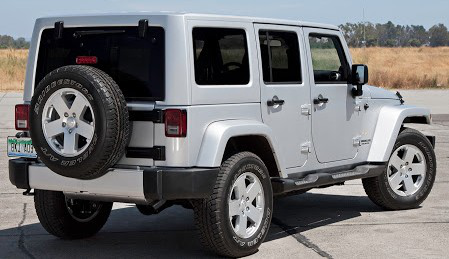

In [54]:
pred_img_file = "car_data/car_data/prediction/jeep2.jpg"
im_pred=open_image(pred_img_file)
im_pred

In [56]:

pred = M.predict(im_pred)
#display(Markdown("###Actual Car: "), )
display(Markdown("<br>"))
display(Markdown("###Predicted Car: "), CAR_CLASSES[pred[1].cpu().numpy()])

color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])

display(Markdown("###CAR Color: "), color_name)

<br>

###Predicted Car: 

'Jeep Wrangler SUV 2012'

###CAR Color: 

'silver'

## Another

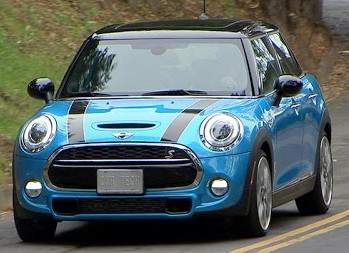

In [57]:
pred_img_file = "car_data/car_data/prediction/mini-cooper.jpg"
im_pred=open_image(pred_img_file)
im_pred

In [58]:

pred = M.predict(im_pred)
#display(Markdown("###Actual Car: "), )
display(Markdown("<br>"))
display(Markdown("###Predicted Car: "), CAR_CLASSES[pred[1].cpu().numpy()])

color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])

display(Markdown("###CAR Color: "), color_name)

<br>

###Predicted Car: 

'MINI Cooper Roadster Convertible 2012'

###CAR Color: 

'darkslategrey'